In [1]:
import os
from utils.data_directory_manager import DataDirectoryManager
from utils.img_diff import OutputAnalysis
from utils.rasterize import rasterize_label, save_raster
import matplotlib.pyplot as plt
import rasterio as rio

In [11]:
base_dir = "/home/dsa/DSA/images_manual"
dm = DataDirectoryManager(base_dir)
test_scene_id = "LC82201072015017LGN00"
rock_shape = "/home/dsa/DSA/vectors/Landsat_8_Derived_Outcrop_Dataset_2016.shp"
rasterize_base = os.path.join(dm.corrected_image_dir, test_scene_id, test_scene_id + "full_color_seg.tif")
actual_path = os.path.join(dm.corrected_image_dir, test_scene_id, test_scene_id + "_burjo_output.tif")
expected_path = os.path.join(dm.corrected_image_dir, "rasterized_rock_shape.tif")
diff_path = os.path.join(dm.corrected_image_dir, "test_diff.tiff")
assert os.path.exists(actual_path)
assert os.path.exists(rasterize_base)

In [12]:

with rio.open(actual_path) as output_tif:
    actual = output_tif.read(1)
print(actual.dtype)


uint16


In [13]:
expected = rasterize_label(rasterize_base, rock_shape)

In [14]:
save_raster(expected[0], expected[1], expected_path)

In [15]:
differ = OutputAnalysis(expected[0], actual)

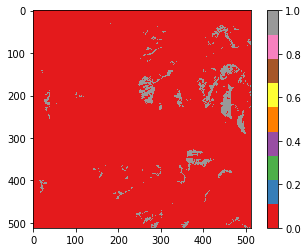

In [16]:
differ.create_fig(expected[0])

In [17]:
diff_raster = differ.img_diff()
save_raster(diff_raster, expected[1], diff_path)

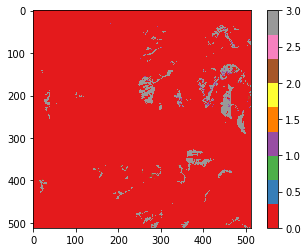

In [18]:
diff_test = differ.create_fig(diff_raster)

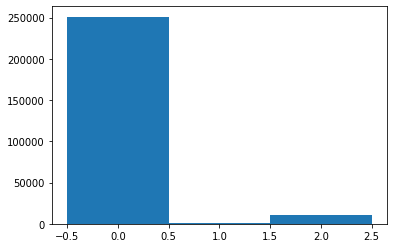

In [19]:
diff_hist = differ.create_diff_hist(diff_raster)